In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

from beam import Cantilever

## Case 1: strength dominated design

In [7]:
loads = [9000, -10000]

c = Cantilever('AL7010', 2000, 140, 2.5, 60, 5, 60, 4)
c.analyse(loads)

{'wmax': 128.20138519433132,
 'rf_t_uf': 1.014760579937766,
 'rf_t_lf': 1.2766193517416151,
 'rf_c_uf': 1.0180901154462736,
 'rf_c_lf': 1.0625482730162876,
 'rf_lb_uf': 1.104288493923847,
 'rf_lb_lf': 1.7582694384200643,
 'rf_s_web': 6.440833333333333,
 'rf_wb': 1.2431778761248158,
 'rf_lat': 0.5253682296432886,
 'Fmax': 10000,
 'mass': 4.8927,
 'cost': 520.6373112000001,
 'area': 867.5,
 'L': 2000,
 'h': 140,
 'tw': 2.5,
 'blf': 60,
 'tlf': 5,
 'buf': 60,
 'tuf': 4,
 'matname': 'AL7010'}

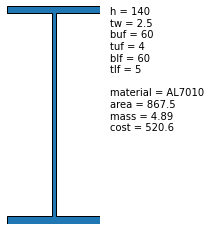

In [8]:
def plot_section(beam):
    vertices = [(0, 0), 
                (beam.blf/2, 0),
                (beam.blf/2, beam.tlf),
                (beam.tw/2, beam.tlf),
                (beam.tw/2, beam.h - beam.tuf),
                (beam.buf/2, beam.h - beam.tuf),
                (beam.buf/2, beam.h),
                (-beam.buf/2, beam.h),
                (-beam.buf/2, beam.h - beam.tuf),
                (-beam.tw/2, beam.h - beam.tuf),
                (-beam.tw/2, beam.tlf),
                (-beam.blf/2, beam.tlf),
                (-beam.blf/2, 0),
               ]
    codes = [mpl.path.Path.MOVETO] + [mpl.path.Path.LINETO]*12
    p = mpl.path.Path(vertices, codes)

    fig, ax = plt.subplots()
    ax.add_patch(mpl.patches.PathPatch(p))
    bbox = p.get_extents()
    ax.set_xlim(bbox.intervalx)
    ax.set_ylim(bbox.intervaly)
    ax.set_aspect(1.0)
    ax.set_axis_off()

    description = f"h = {beam.h}\n" +\
    f"tw = {beam.tw}\n" +\
    f"buf = {beam.buf}\n" +\
    f"tuf = {beam.tuf}\n" +\
    f"blf = {beam.blf}\n" +\
    f"tlf = {beam.tlf}\n\n" +\
    f"material = {beam.matname}\n" +\
    f"area = {beam.area:.1f}\n" +\
    f"mass = {beam.mass():.2f}\n" +\
    f"cost = {beam.cost():.1f}"

    ax.text(0.6*beam.buf, beam.h, description,  
            horizontalalignment='left',
            verticalalignment='top',
    );
    
plot_section(c)

## Case 2: 1000

In [9]:
loads = [16000, -30000]

c2 = Cantilever('AL7010', 1000, 180, 3.2, 50, 6, 50, 6)
c2.analyse(loads)

{'wmax': 24.25170754914758,
 'rf_t_uf': 1.1077526400000002,
 'rf_t_lf': 2.0770361999999998,
 'rf_c_uf': 1.9013091428571431,
 'rf_c_lf': 1.0140315428571427,
 'rf_lb_uf': 6.909267952662724,
 'rf_lb_lf': 3.684942908086785,
 'rf_s_web': 3.5242666666666667,
 'rf_wb': 1.11428070812484,
 'rf_lat': 1.4061674873333296,
 'Fmax': 30000,
 'mass': 3.2080319999999998,
 'cost': 279.45342719999996,
 'area': 1137.6,
 'L': 1000,
 'h': 180,
 'tw': 3.2,
 'blf': 50,
 'tlf': 6,
 'buf': 50,
 'tuf': 6,
 'matname': 'AL7010'}

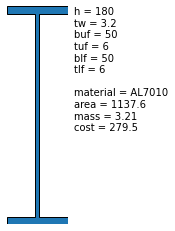

In [5]:
plot_section(c2)

## Case 3: 2000, low load, stiffness constraint

In [6]:
import math
from numbers import Number

loads = [1000, -5000]

c2 = Cantilever('AL7010', 1500, 300, 2, 60, 3, 60, 2)
for k, v in c2.analyse(loads).items():
    if isinstance(v, Number):
        if math.isfinite(v):
            print(f"{k}: {v:.2f}")
    else:
        print(f"{k}: {v}")

wmax: 7.32
rf_t_uf: 4.66
rf_t_lf: 26.49
rf_c_uf: 20.16
rf_c_lf: 4.62
rf_lb_uf: 5.61
rf_lb_lf: 2.87
rf_s_web: 23.21
rf_wb: 0.69
rf_lat: 2.07
Fmax: 5000.00
mass: 3.76
cost: 838.88
area: 890.00
L: 1500.00
h: 300.00
tw: 2.00
blf: 60.00
tlf: 3.00
buf: 60.00
tuf: 2.00
matname: AL7010
